<a href="https://colab.research.google.com/github/LazaroR-u/EDA/blob/main/Saratoga_Houses_Price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import style


In [5]:
# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
df= pd.read_csv("https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/SaratogaHouses.csv", sep=",")
df.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [7]:
#Renombramos las columnas
df.columns= ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

##Analisis exploratorio de datos

In [9]:
df.head()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precio,1728.0,211966.705440,98441.391015,5000.0,145000.00,189900.00,259000.00,775000.0
metros_totales,1728.0,0.500214,0.698680,0.0,0.17,0.37,0.54,12.2
antiguedad,1728.0,27.916088,29.209988,0.0,13.00,19.00,34.00,225.0
precio_terreno,1728.0,34557.187500,35021.168056,200.0,15100.00,25000.00,40200.00,412600.0
metros_habitables,1728.0,1754.975694,619.935553,616.0,1300.00,1634.50,2137.75,5228.0
universitarios,1728.0,55.567708,10.333581,20.0,52.00,57.00,64.00,82.0
dormitorios,1728.0,3.154514,0.817351,1.0,3.00,3.00,4.00,7.0
chimenea,1728.0,0.601852,0.556102,0.0,0.00,1.00,1.00,4.0
banyos,1728.0,1.900174,0.658352,0.0,1.50,2.00,2.50,4.5
habitaciones,1728.0,7.041667,2.316453,2.0,5.00,7.00,8.25,12.0


###Buscando NANs 

In [12]:
#tama;o total de nuestros datos
df.shape

(1728, 16)

In [14]:
df.isna().sum().sort_values()

precio                0
metros_totales        0
antiguedad            0
precio_terreno        0
metros_habitables     0
universitarios        0
dormitorios           0
chimenea              0
banyos                0
habitaciones          0
calefaccion           0
consumo_calefacion    0
desague               0
vistas_lago           0
nueva_construccion    0
aire_acondicionado    0
dtype: int64

En este conjunto de datos no tenemos NANs. 

### Estudio de la distribucion de la variable target

Vamos a graficar como estan distribuidos los precios de las casas en nuestro dataframe. 

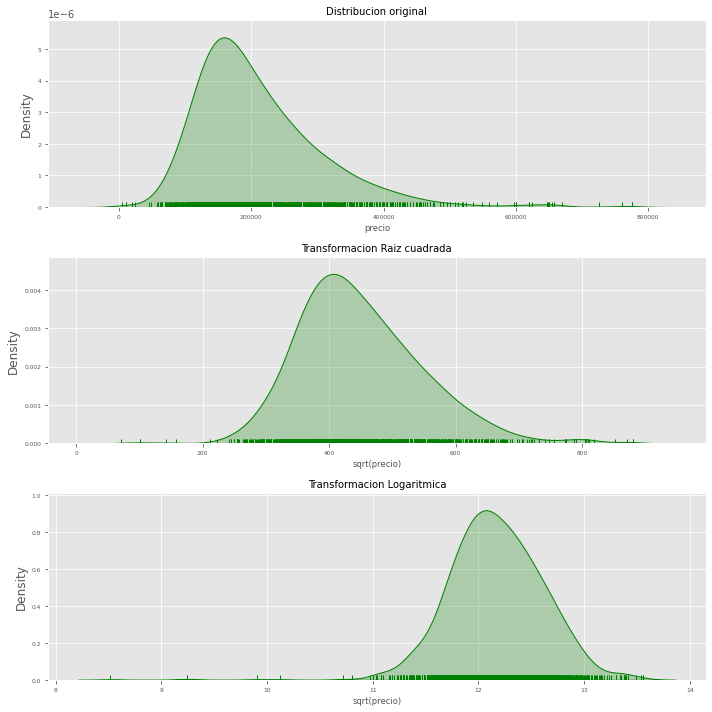

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize= (10,10))

#
sns.distplot(
    df["precio"], hist = False, rug = True, color = "green", 
             kde_kws={"shade" : True, "linewidth" : 1}, ax = axes[0] 
             )

axes[0].set_title("Distribucion original", fontsize = "medium")
axes[0].set_xlabel("precio", fontsize = "small")
axes[0].tick_params(labelsize = 6)

#
sns.distplot(
    np.sqrt(df["precio"]), hist = False, rug = True, color = "green", 
             kde_kws={"shade" : True, "linewidth" : 1}, ax = axes[1] 
             )

axes[1].set_title("Transformacion Raiz cuadrada", fontsize = "medium")
axes[1].set_xlabel("sqrt(precio)", fontsize = "small")
axes[1].tick_params(labelsize = 6)

#
sns.distplot(
    np.log(df["precio"]), hist = False, rug = True, color = "green", 
             kde_kws={"shade" : True, "linewidth" : 1}, ax = axes[2] 
             )

axes[2].set_title("Transformacion Logaritmica", fontsize = "medium")
axes[2].set_xlabel("sqrt(precio)", fontsize = "small")
axes[2].tick_params(labelsize = 6)

fig.tight_layout()


Veamos que tipo de distribucion se ajusta mejor a estos datos usando la libreria **fitter**.

In [23]:
!pip install fitter

     |████████████████████████████████| 47 kB 3.8 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25025 sha256=4ea48d2faf9a2c972498ac0680e725c06a979d43b6356e925c79a66cd7762f07
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=9138ad2f1942f0e781ef0f7f07f24ed6ecd3f822ab2365a139959e9e38173714
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [24]:
from fitter import Fitter, get_common_distributions

,sumsquare_error,aic,bic,kl_div
beta,2.497420e-11,3068.852573,-55037.908642,inf
logistic,4.913880e-11,3147.967019,-53883.297831,inf
cauchy,5.221450e-11,2956.669693,-53778.388707,inf
chi2,5.776892e-11,3321.818880,-53596.249282,inf
norm,6.947514e-11,3324.534158,-53284.856663,inf
expon,2.915346e-10,2824.103160,-50806.577128,inf
powerlaw,3.078034e-10,2741.669837,-50705.287086,inf
exponpow,4.841645e-10,inf,-49922.566370,NaN
gamma,4.841645e-10,inf,-49922.566370,3.958212


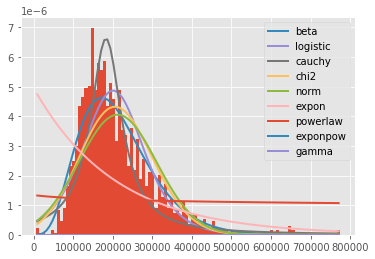

In [27]:
distribuciones = ["cauchy", "chi2", "expon", "exponpow", "gamma", "norm", "powerlaw", "beta", "logistic"]

fitter = Fitter(df.precio, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest = 10, plot = True)

La distribucion que mejor se ajusta a los datos es la distribucion beta. 


,sumsquare_error,aic,bic,kl_div
beta,2.497420e-11,3068.852573,-55037.908642,inf


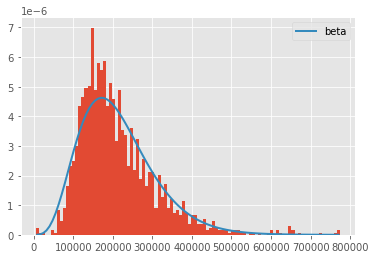

In [28]:
fitter.summary(Nbest=1, plot=True)

###Analisis de variables numericas dependientes

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

In [31]:
df.select_dtypes(include= ["float64", "int64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
precio,1728.0,211966.705440,98441.391015,5000.0,145000.00,189900.00,259000.00,775000.0
metros_totales,1728.0,0.500214,0.698680,0.0,0.17,0.37,0.54,12.2
antiguedad,1728.0,27.916088,29.209988,0.0,13.00,19.00,34.00,225.0
precio_terreno,1728.0,34557.187500,35021.168056,200.0,15100.00,25000.00,40200.00,412600.0
metros_habitables,1728.0,1754.975694,619.935553,616.0,1300.00,1634.50,2137.75,5228.0
universitarios,1728.0,55.567708,10.333581,20.0,52.00,57.00,64.00,82.0
dormitorios,1728.0,3.154514,0.817351,1.0,3.00,3.00,4.00,7.0
chimenea,1728.0,0.601852,0.556102,0.0,0.00,1.00,1.00,4.0
banyos,1728.0,1.900174,0.658352,0.0,1.50,2.00,2.50,4.5
habitaciones,1728.0,7.041667,2.316453,2.0,5.00,7.00,8.25,12.0


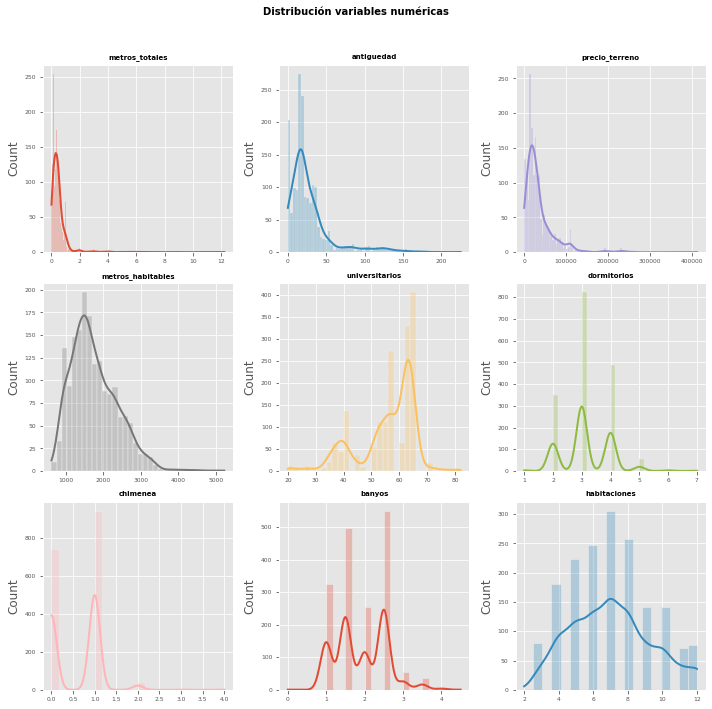

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
axes = axes.flat

col_numericas = df.select_dtypes(include=["int64", "float64"]).columns 
col_numericas = col_numericas.drop("precio")

#Histogramas de las variables numericas

for i, colum in enumerate(col_numericas):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

La variable chimenea es mas de tipo categorico, entonces lo cambiamos

In [48]:
df.chimenea.value_counts()

1    942
0    740
2     42
3      2
4      2
Name: chimenea, dtype: int64

In [49]:
df.chimenea = df.chimenea.astype("str")

###Correlacion de variables con la variable independiente "precio"

generaremos un modelo lineal para cada variable numerica y la variable "precio"

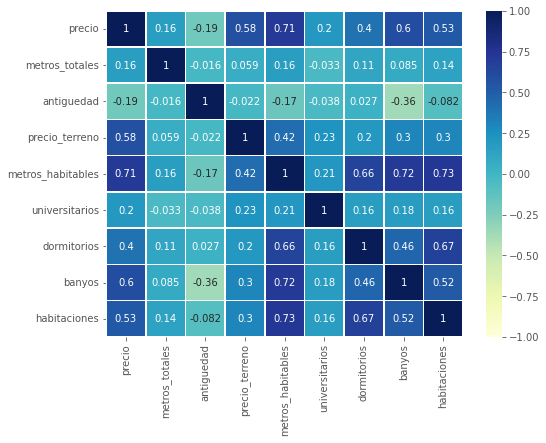

In [50]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);


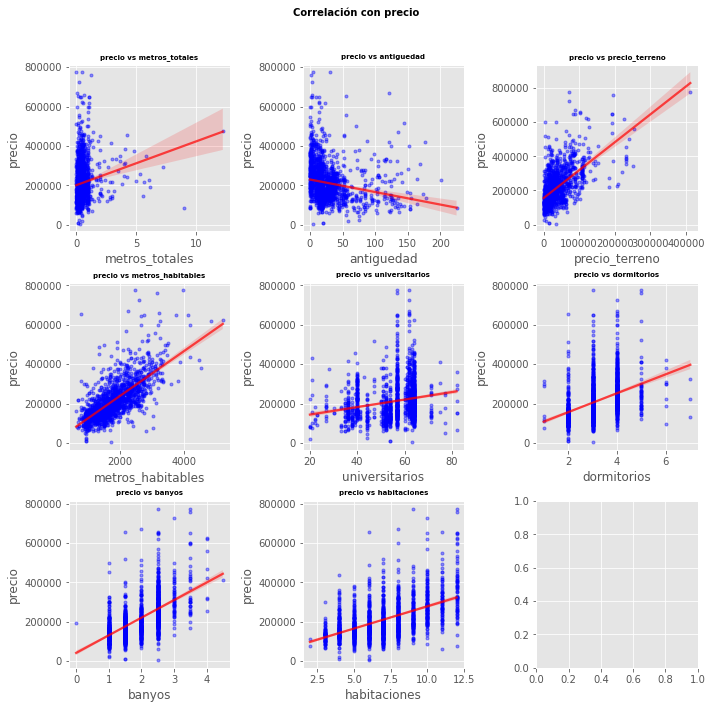

In [54]:
fig, axes = plt.subplots(nrows=3, ncols= 3, figsize = (10,10))
axes= axes.flat 

col_numericas = df.select_dtypes(include=["int64", "float64"]).columns 
col_numericas = col_numericas.drop("precio")

for i, colum in enumerate(col_numericas): 
  sns.regplot( 
      x=df[colum], 
      y=df["precio"],
      data = df, 
      color = "blue",
      marker =".", 
      scatter_kws = {"alpha" : 0.4}, 
      line_kws = {"color" : "r", "alpha" : 0.7}, 
      ax = axes[i]
      )
  axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");